## Part 2 - Multiple linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Load data from the file

In [2]:
data = pd.read_csv('/Users/vince/Documents/machineLearningAZ/data/part2/50_Startups.csv')

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Examaine the data set

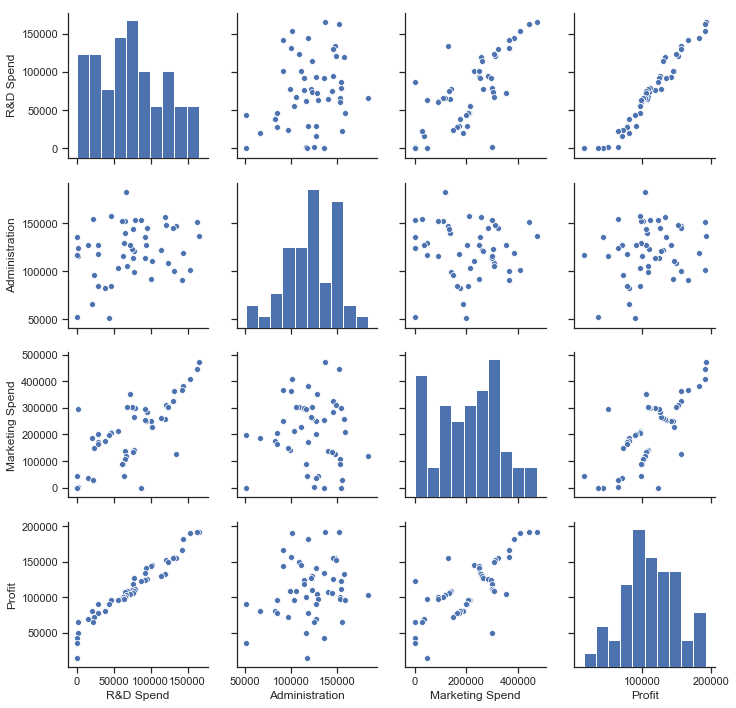

In [3]:
sns.set(style="ticks")
sns.pairplot(data)

We can see from the plot that the profit is highly correlated to the R&D and somewhat correlated to the marketing spending

In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Preprocess the data set

1) Get the independant variables - features (X) and the dependant variable - target (y)

In [5]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

In [6]:
stateNumValues = LabelEncoder()
X[:,3] = stateNumValues.fit_transform(X[:,3])

In [7]:
stateEncoder = OneHotEncoder(categorical_features=[3])
X = stateEncoder.fit_transform(X).toarray()

In [8]:
minMaxX = MinMaxScaler()
X = minMaxX.fit_transform(X)


In [9]:
Xtrain,Xtest,ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [10]:
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
ypred = model.predict(Xtest)

In [12]:
r2_score(ytest, ypred) 

0.9447047644114072